In [2]:
import pandas as pd
data=pd.read_excel('data-sell4all.xlsx')
data.to_csv('data-sell4all.csv',index=False)
data

,Pays,Age,Genre,Dépenses des clients
0,France,32,Female,150.50
1,Germany,45,Male,200.75
2,Spain,28,Female,75.25
3,Italy,39,Male,180.00
4,UK,52,Female,250.30
...,...,...,...,...
60,Digital Realm,NaN,AI,1010101.01
61,Multiverse,∞,Non-Binary,π
62,Error,NaN,404,NaN
63,"Greece, Italy",25;30,Male;Female,100+200


In [3]:
#explorer les données disponibles
print(data.info())
print(data.describe())
print(data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Pays                  65 non-null     object
 1    Age                  62 non-null     object
 2   Genre                 64 non-null     object
 3   Dépenses des clients  63 non-null     object
dtypes: object(4)
memory usage: 2.2+ KB
None
          Pays   Age    Genre Dépenses des clients
count       65     62      64                   63
unique      20     40      12                   59
top     France     28  Female               195.25
freq        10      3      27                    2
Index(['Pays', ' Age ', 'Genre', 'Dépenses des clients'], dtype='object')


In [5]:
#nettoyage
data.columns = data.columns.str.strip()
print(data.columns)

data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
data['Dépenses des clients'] = pd.to_numeric(data['Dépenses des clients'], errors='coerce')

data = data.dropna()

data = data[data['Age'] >= 0]
data['Dépenses des clients'] = data['Dépenses des clients'].apply(lambda x: np.nan if isinstance(x, str) and not x.replace('.', '', 1).isdigit() else x)
data = data.dropna()
print(data)

Index(['Pays', 'Age', 'Genre', 'Dépenses des clients'], dtype='object')
         Pays     Age      Genre  Dépenses des clients
0      France    32.0     Female                150.50
1     Germany    45.0       Male                200.75
2       Spain    28.0     Female                 75.25
3       Italy    39.0       Male                180.00
4          UK    52.0     Female                250.30
5      France    22.0       Male                 90.00
6     Germany    36.0     Female                175.50
7       Spain    41.0       Male                120.75
8       Italy    29.0     Female                 95.25
9          UK    48.0       Male                220.00
10     France    35.0     Female                160.25
11    Germany    27.0       Male                 85.50
12      Spain    50.0     Female                190.75
13      Italy    33.0       Male                140.00
14         UK    44.0     Female                210.50
15     France    31.0       Male                

In [49]:
#sur les 5 premières lignes du fichier CSV
data.head()

,Pays,Age,Genre,Dépenses des clients
0,France,32.0,Female,150.50
1,Germany,45.0,Male,200.75
2,Spain,28.0,Female,75.25
3,Italy,39.0,Male,180.00
4,UK,52.0,Female,250.30


In [50]:
#nombre de lignes
data.shape[0]

54

data.shape[0] donne le nombre de lignes dans le DataFrame, qui est 54 dans ce cas apres le nettoyage. Cela indique qu'il y a 54 enregistrements ou observations dans le fichier CSV.

In [51]:
#les colonnes du fichier CSV
data.columns.tolist()

['Pays', 'Age', 'Genre', 'Dépenses des clients']

La fonction data.columns.tolist() retourne une liste des noms des colonnes du DataFrame, qui sont de ce cas Pays, Age, Genre et Dépenses des clients

In [6]:
#les types de données des champs du fichier CSV
data.dtypes

Pays                     object
Age                     float64
Genre                    object
Dépenses des clients    float64
dtype: object

la method data.dtype donne les types de donnes des differents champs existe dans la DataFrame

In [57]:
import pandas as pd
import numpy as np

median_age = data['Age'].median()
mean_age = data['Age'].mean()

median_depenses = data['Dépenses des clients'].median()
mean_depenses = data['Dépenses des clients'].mean()

print(median_age)
print(mean_age)
print(median_depenses)
print(mean_depenses)


36.5
57.31481481481482
162.625
159.95944444444447


# partie2

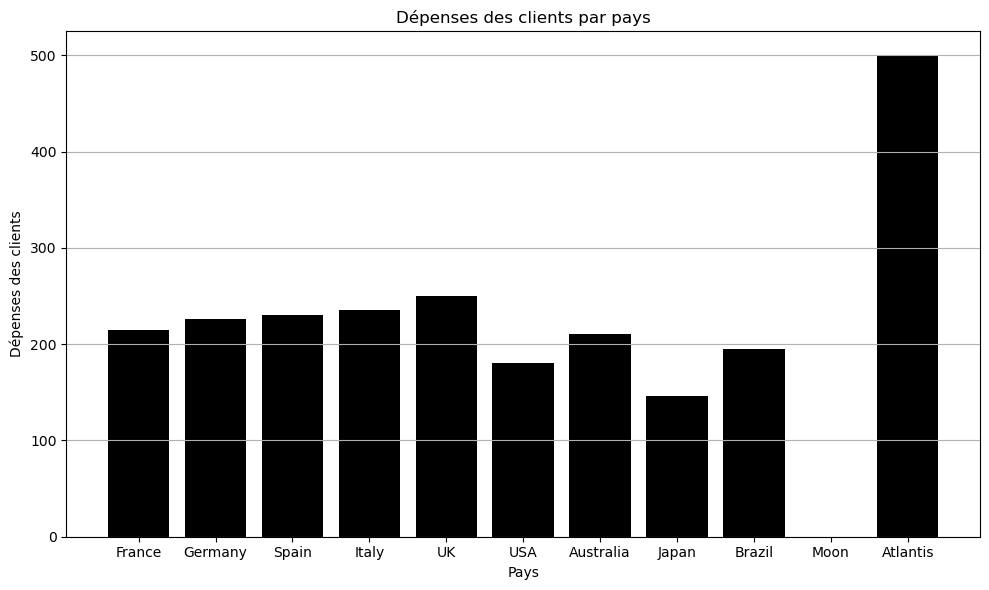

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

pays = data['Pays']
depenses = data['Dépenses des clients']

plt.figure(figsize=(10, 6))
plt.bar(pays, depenses, color='black')
plt.xlabel('Pays')
plt.ylabel('Dépenses des clients')
plt.title('Dépenses des clients par pays')
plt.tight_layout()
plt.grid(axis='y')
plt.show()


In [71]:
#supprimez toutes les lignes d’utilisateurs ayant dépensé moins de 10 € sur le site,
data_filtered = data[data['Dépenses des clients'] >= 10]
data_filtered

,Pays,Age,Genre,Dépenses des clients
0,France,32.0,Female,150.50
1,Germany,45.0,Male,200.75
2,Spain,28.0,Female,75.25
3,Italy,39.0,Male,180.00
4,UK,52.0,Female,250.30
5,France,22.0,Male,90.00
6,Germany,36.0,Female,175.50
7,Spain,41.0,Male,120.75
8,Italy,29.0,Female,95.25
9,UK,48.0,Male,220.00


In [75]:
#supprimer toutes les lignes qui apparaissent plus d’une fois dans les données
data_clean = data_filtered.drop_duplicates()
data_clean.shape

(52, 4)

In [77]:
colonnes_desees = ['Pays', 'Age', 'Genre', 'Dépenses des clients']
data_clean = data_clean[colonnes_desees]

# Enregistrer les données nettoyées dans un nouveau fichier CSV
data_clean.to_csv('data_nettoyees.csv', index=False)


In [78]:
df=pd.read_csv("data_nettoyees.csv")
df

,Pays,Age,Genre,Dépenses des clients
0,France,32.0,Female,150.50
1,Germany,45.0,Male,200.75
2,Spain,28.0,Female,75.25
3,Italy,39.0,Male,180.00
4,UK,52.0,Female,250.30
5,France,22.0,Male,90.00
6,Germany,36.0,Female,175.50
7,Spain,41.0,Male,120.75
8,Italy,29.0,Female,95.25
9,UK,48.0,Male,220.00
